<a href="https://colab.research.google.com/github/itsaryan72/eu-ai-impact-insights/blob/main/eu_ai_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
file_path = "/Users/aryanverma/Downloads/newData.csv"

from google.colab import files
uploaded = files.upload()

Saving newData.csv to newData.csv


In [36]:
print(os.listdir())

['.config', 'newData.csv', '.ipynb_checkpoints', 'sample_data']


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#for better plots
sns.set(style='whitegrid')

In [26]:
df = pd.read_csv("newData.csv", encoding='cp1252')
df.columns = df.columns.str.strip()
print(df.head())

      ID                         Title (EN)  \
0  107.0            AI-powered HR Screening   
1  108.0                Predictive Policing   
2  109.0    AI Chatbot for Customer Service   
3  110.0  AI in Finance for Fraud Detection   
4  111.0        Self-driving Car Navigation   

                               Description (EN & DE) Enterprise Function  \
0             Automates recruitment processes in HR.                  HR   
1  AI tools used in law enforcement to predict cr...               Legal   
2    AI-powered chatbots providing customer support.        Marketing/HR   
3  AI models used to detect fraudulent activities...             Finance   
4                AI that drives autonomous vehicles.      Transportation   

  Risk Class                             Classification Details  \
0  High-Risk         Automates candidate selection and analysis   
1  High-Risk    Potential misuse or bias in predictive outcomes   
2   Low-Risk  Provides automated responses, no significant 

In [27]:
# Clearning and exploring data
print(df.isnull().sum())

ID                        0
Title (EN)                0
Description (EN & DE)     0
Enterprise Function       0
Risk Class                0
Classification Details    0
Applicable Annex          0
Sub-Item                  0
Comments                  0
dtype: int64


In [28]:
print(df.dtypes)

ID                        float64
Title (EN)                 object
Description (EN & DE)      object
Enterprise Function        object
Risk Class                 object
Classification Details     object
Applicable Annex           object
Sub-Item                  float64
Comments                   object
dtype: object


In [29]:
print(df.describe())

               ID   Sub-Item
count   21.000000  21.000000
mean   117.000000   4.238095
std      6.204837   2.586595
min    107.000000   1.000000
25%    112.000000   2.000000
50%    117.000000   4.000000
75%    122.000000   6.000000
max    127.000000   8.000000


In [30]:
print(df.head())


      ID                         Title (EN)  \
0  107.0            AI-powered HR Screening   
1  108.0                Predictive Policing   
2  109.0    AI Chatbot for Customer Service   
3  110.0  AI in Finance for Fraud Detection   
4  111.0        Self-driving Car Navigation   

                               Description (EN & DE) Enterprise Function  \
0             Automates recruitment processes in HR.                  HR   
1  AI tools used in law enforcement to predict cr...               Legal   
2    AI-powered chatbots providing customer support.        Marketing/HR   
3  AI models used to detect fraudulent activities...             Finance   
4                AI that drives autonomous vehicles.      Transportation   

  Risk Class                             Classification Details  \
0  High-Risk         Automates candidate selection and analysis   
1  High-Risk    Potential misuse or bias in predictive outcomes   
2   Low-Risk  Provides automated responses, no significant 

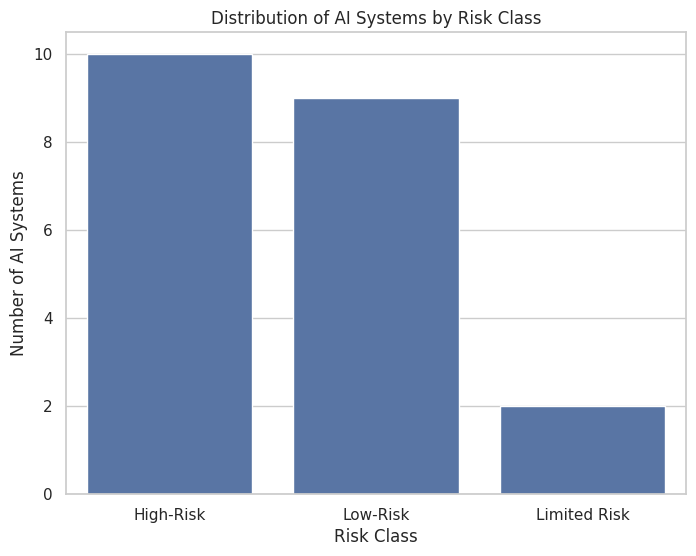

In [31]:
# Analyzing & Visualizing data

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Risk Class')
plt.title('Distribution of AI Systems by Risk Class')
plt.xlabel('Risk Class')
plt.ylabel('Number of AI Systems')
plt.show()

<Figure size 1000x600 with 0 Axes>

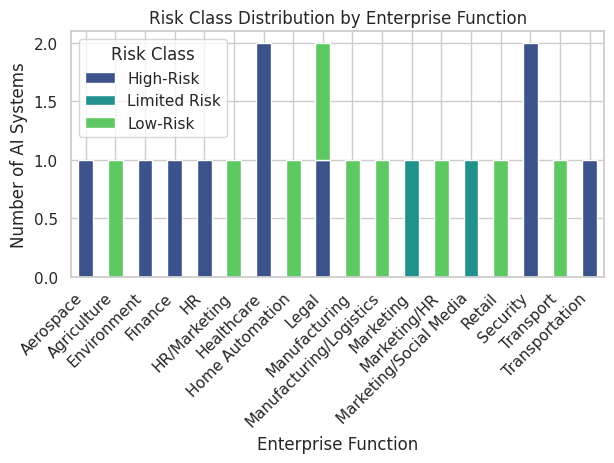

In [32]:
plt.figure(figsize=(10, 6))
risk_class_by_function = df.groupby(['Enterprise Function', 'Risk Class']).size().unstack()
risk_class_by_function.plot(kind='bar',stacked=True,color = sns.color_palette('viridis', n_colors=len(risk_class_by_function.columns)))

plt.title('Risk Class Distribution by Enterprise Function')
plt.xlabel('Enterprise Function')
plt.ylabel('Number of AI Systems')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Risk Class')
plt.tight_layout()
plt.show()

<ipython-input-33-e2e4a9b81d33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Applicable Annex',palette='magma')


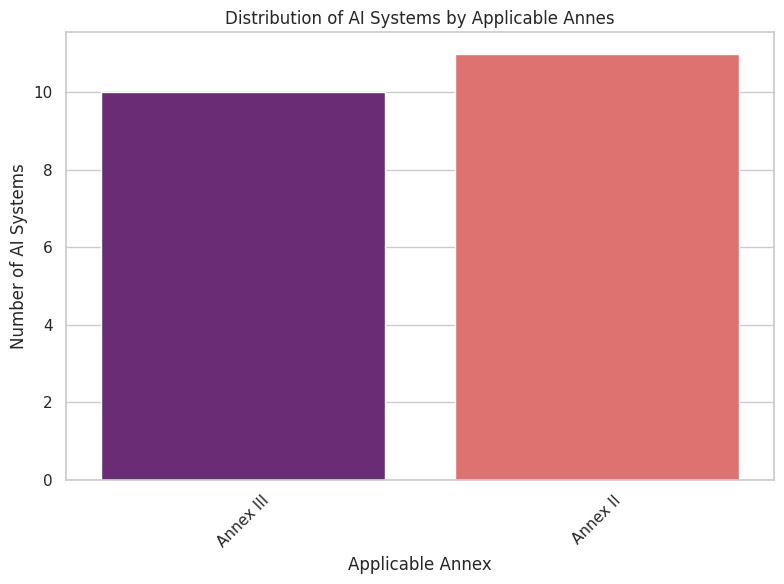

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Applicable Annex',palette='magma')

plt.title('Distribution of AI Systems by Applicable Annes')
plt.xlabel('Applicable Annex')
plt.ylabel('Number of AI Systems')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

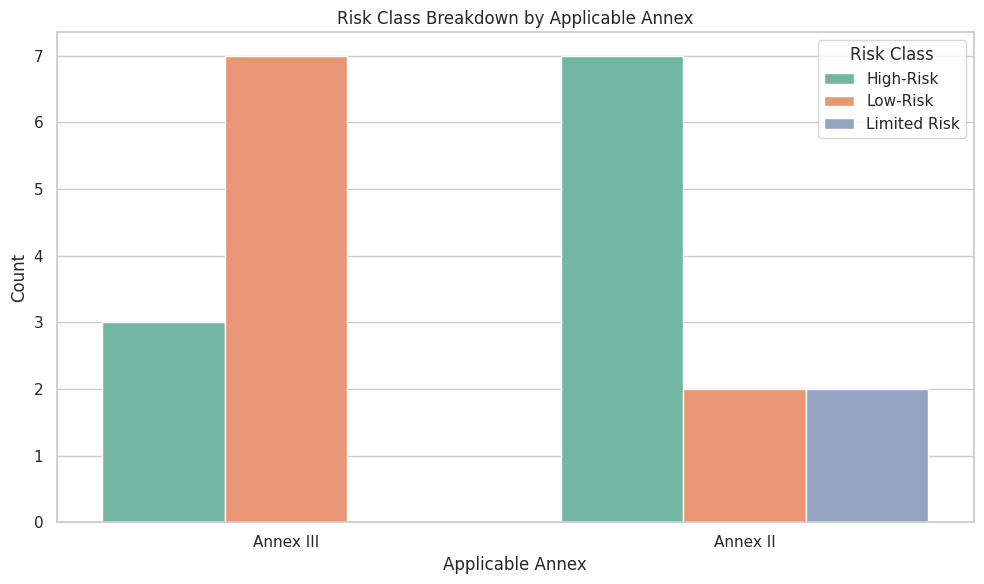

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Applicable Annex', hue='Risk Class', palette='Set2')

plt.title('Risk Class Breakdown by Applicable Annex')
plt.xlabel('Applicable Annex')
plt.ylabel('Count')
plt.legend(title='Risk Class')
plt.tight_layout()
plt.show()


<ipython-input-35-f71a19d7ee6b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Enterprise Function', order=df['Enterprise Function'].value_counts().index, palette='coolwarm')


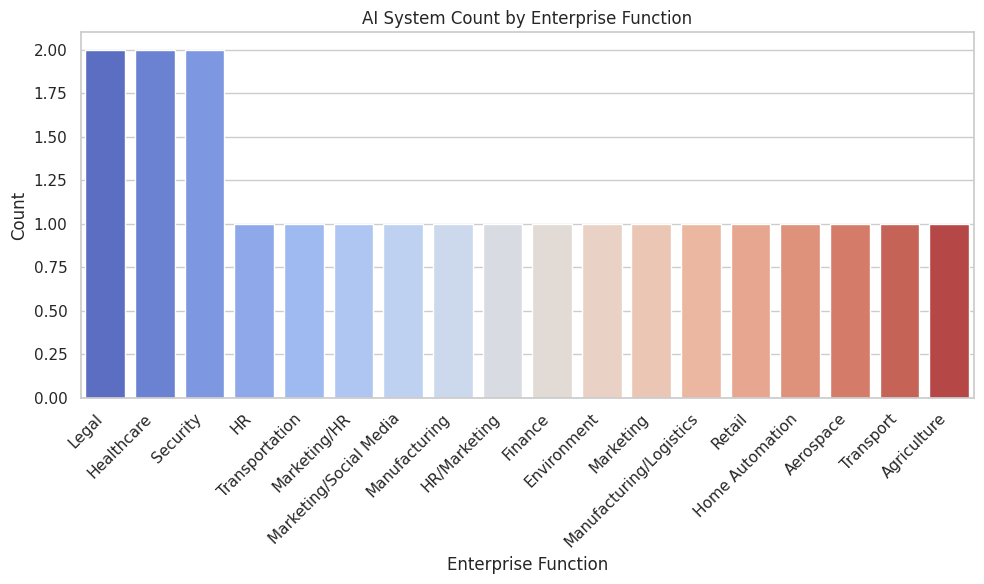

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Enterprise Function', order=df['Enterprise Function'].value_counts().index, palette='coolwarm')

plt.title('AI System Count by Enterprise Function')
plt.xlabel('Enterprise Function')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()